# Multiclass Classification
* traning Ai to recognize patterns in data to classify the data as diffrent things
* e.g., training an ai to recognize if its an image of a pizza or a horse or a bird now these are random examples but you understand
* this code will have
1. data preparation
2. model building
3. training and testing loops
4. testing

In [ ]:
# for our imports
import torch
import sklearn
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
NUM_CLASS=4
NUM_FEATURES=2
RANDOM_SEED=54
# these are all hyperparameters


In [ ]:
# creating dataset
x_blob,y_blob=make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASS,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

In [ ]:
# turn data in tensors
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor) # make sure you get this datatype correct
# split the datasets
x_train,x_test,y_train,y_test=train_test_split(
    x_blob,y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)
x_train.size(),y_train.size()

(torch.Size([800, 2]), torch.Size([800]))

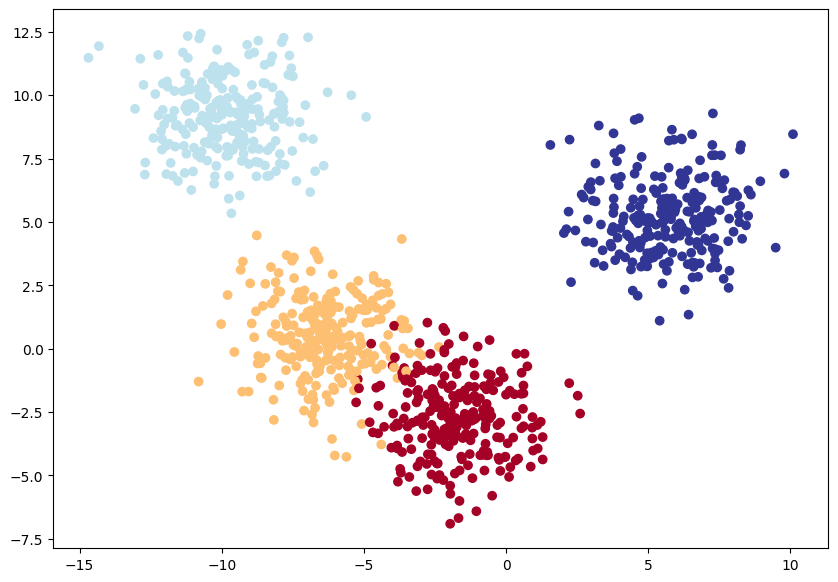

In [ ]:
# to plot this data on a scatterplot
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [ ]:
# define device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
#build a model
class blob_model(nn.Module):
  def __init__(self,infeatures,outfeatures,hiddenUnits=8):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Linear(in_features=infeatures,out_features=hiddenUnits),
        nn.ReLU(),
        nn.Linear(in_features=hiddenUnits,out_features=hiddenUnits),
        nn.ReLU(),
        nn.Linear(in_features=hiddenUnits,out_features=outfeatures)
    )
  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
#creating instance of our model
model_0=blob_model(
    infeatures=2,
    outfeatures=4,
    hiddenUnits=8
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.0.weight',
              tensor([[ 0.0945,  0.2078],
                      [ 0.6920,  0.2040],
                      [-0.2426,  0.4609],
                      [ 0.2551, -0.0173],
                      [-0.4200,  0.0844],
                      [-0.6397, -0.4753],
                      [-0.4899,  0.3462],
                      [ 0.5259,  0.0610]])),
             ('layer_stack.0.bias',
              tensor([ 0.5657,  0.0060,  0.1304, -0.7045, -0.3679,  0.6607,  0.1800,  0.4955])),
             ('layer_stack.2.weight',
              tensor([[ 0.0322,  0.1436, -0.0855, -0.3232,  0.2695, -0.0656, -0.2644,  0.2242],
                      [-0.1897,  0.2774,  0.2174, -0.0292, -0.0878, -0.2972, -0.1972, -0.1541],
                      [ 0.2231,  0.1053, -0.3333,  0.0431,  0.2817, -0.2054,  0.3108,  0.3182],
                      [ 0.1864, -0.0817, -0.1944,  0.2524,  0.3209,  0.1575, -0.2125, -0.1824],
                      [-0.2181,  0.0526,  0.0345,  0.0864,  0.3347, 

In [ ]:
# create loss and optimizer function
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
# building a training and testing loop
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)
epochs=10000
#putting data and model on the same device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
model_0.to(device)

for epoch in range(epochs):
  #putting model in training mode
  model_0.train()
  # the standard training loop
  y_logits=model_0(x_train)
  loss=loss_fn(y_logits,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #the standard testing loop
  model_0.eval()
  with torch.inference_mode():
    t_logits=model_0(x_test)
    t_loss=loss_fn(t_logits,y_test)
  if epoch%1000 == 0:
    print(f" epoch = {epoch} loss= {loss} test loss {t_loss}")


 epoch = 0 loss= 0.03572836518287659 test loss 0.07473236322402954
 epoch = 1000 loss= 0.034229472279548645 test loss 0.07719803601503372
 epoch = 2000 loss= 0.03350374847650528 test loss 0.07908762246370316
 epoch = 3000 loss= 0.033082474023103714 test loss 0.07991832494735718
 epoch = 4000 loss= 0.0327603854238987 test loss 0.07999902218580246
 epoch = 5000 loss= 0.03245539218187332 test loss 0.07980038225650787
 epoch = 6000 loss= 0.03213820233941078 test loss 0.07960424572229385
 epoch = 7000 loss= 0.031817782670259476 test loss 0.07938352972269058
 epoch = 8000 loss= 0.03152984008193016 test loss 0.07934022694826126
 epoch = 9000 loss= 0.03126256540417671 test loss 0.07936372607946396


In [ ]:
#make predictions
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


This is a helper function from daneal bourke's github repo

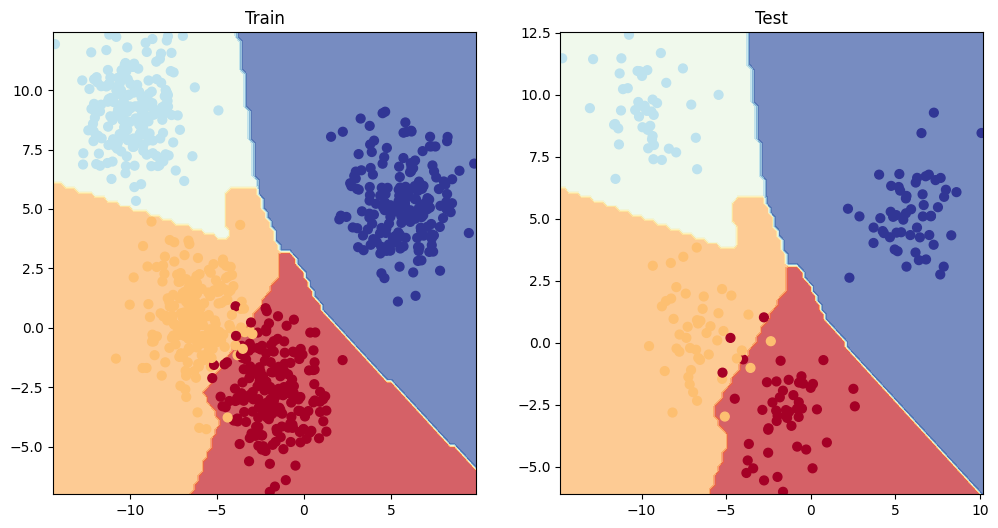

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)

In [ ]:
# to find accurecy of our model
!pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 813.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'

In [ ]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASS).to(device)

# Make predictions on the test set
model_0.eval()
with torch.inference_mode():
    y_test_logits = model_0(x_test)
    y_test_pred_probs = torch.softmax(y_test_logits, dim=1)
    y_test_preds = torch.argmax(y_test_pred_probs, dim=1)

# Calculuate accuracy
accuracy = torchmetric_accuracy(y_test_preds, y_test)
print(f"Model accuracy on test set: {accuracy:.2f}")
# we cannot imporve this moddel further as the data does not permits us to do so

Model accuracy on test set: 0.96
